### Questionnaires (qs.csv) - [One record per questionnaire per question per time point per visit per subject]

This dataset contains info on:
- **EDSS**
- FS scores 
- RAND-36 
- SF-12 
- BDI-II

In [70]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/MSOAC Placebo Data',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/MSOAC Placebo dataset/csv files'
]

file_name = 'qs.csv'
file_path = next(f'{path}/{file_name}' for path in possible_paths if os.path.exists(f'{path}/{file_name}'))

# Read the CSV file into a DataFrame
qs = pd.read_csv(file_path)

C:\Users\anaso\AppData\Local\Temp\ipykernel_17580\2053704189.py:17: DtypeWarning: Columns (4,9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  qs = pd.read_csv(file_path)


Check how many missing values we have per column. 

In [71]:
missing_percentage_qs = (qs.isnull().sum() / len(qs)) * 100
missing_qs = pd.DataFrame({'Column Name': missing_percentage_qs.index, 'Missing Percentage': missing_percentage_qs.values})
missing_qs = missing_qs.sort_values(by='Missing Percentage', ascending=False)
print(missing_qs)

   Column Name  Missing Percentage
29    QSRFTDTC          100.000000
28    QSTPTREF          100.000000
5       QSSPID          100.000000
27      QSELTM          100.000000
26    QSTPTNUM          100.000000
25       QSTPT          100.000000
23       QSDTC          100.000000
11    QSORRESU          100.000000
19      QSEVAL          100.000000
18     QSDRVFL          100.000000
14    QSSTRESU          100.000000
16    QSREASND           99.997550
15      QSSTAT           99.643583
17      QSBLFL           89.925420
22     VISITDY           82.796628
4      QSGRPID           80.735645
30    QSEVLINT           65.621993
9       QSSCAT           59.320312
24        QSDY           24.402110
13    QSSTRESN            0.578733
10     QSORRES            0.476263
12    QSSTRESC            0.356417
1       DOMAIN            0.000000
20    VISITNUM            0.000000
21       VISIT            0.000000
8        QSCAT            0.000000
7       QSTEST            0.000000
6     QSTESTCD      

Remove columns with more than 80% missingness as well as redundant columns.

In [72]:
# Set the threshold for missing percentage
threshold = 80

# Filter columns based on missing percentage
columns_to_drop = missing_qs[missing_qs['Missing Percentage'] >= threshold]['Column Name']

# Drop columns from the DataFrame
qs = qs.drop(columns=columns_to_drop)

# Remove redundant columns
qs = qs.drop(columns=['STUDYID', 'DOMAIN', 'QSTESTCD']) #, 'QSORRES'

In [73]:
qs.sort_values(by=['USUBJID', 'QSSEQ'], inplace=True)
qs.head()

,USUBJID,QSSEQ,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESC,QSSTRESN,VISITNUM,VISIT,QSDY,QSEVLINT
216853,MSOAC/0014,1,EDSS01-Expanded Disability Score,EDSS,NaN,1,1,1.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216854,MSOAC/0014,2,KFSS1-Pyramidal Functions,KFSS,NaN,1,1,1.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216855,MSOAC/0014,3,KFSS1-Cerebellar Functions,KFSS,NaN,0,0,0.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216856,MSOAC/0014,4,KFSS1-Brain Stem Functions,KFSS,NaN,0,0,0.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216857,MSOAC/0014,5,KFSS1-Sensory Functions,KFSS,NaN,0,0,0.0,1.0,SCREENING D-28 TO -2,NaN,NaN


Overview of all dropped columns:

- **STUDYID**: Study Identifier (irrelevant - always the same value)
- **DOMAIN**: Domain Abbreviation (irrelevant - always the same value)
- **QSTESTCD**: Question Short Name (contains the same info as QSTEST = Question Name)
- **QSORRES**: Finding in Original Units (contains the same info as "QSSTRESC" = Character Result/Finding in Std Format, except that there can be incosistencies in the values of QSORRES)
- **QSRFTDTC, QSTPTREF, QSSPID, QSELTM, QSTPTNUM, QSTPT, QSDTC, QSORRESU, QSEVAL, QSDRVFL, QSSTRESU**: all values missing and not even mentioned in the data dictionary 
- **QSREASND**: Reason Not Performed (missing for 99.998% of observations)
- **QSSTAT**: Completion Status (missing for 99.6% of observations)
- **QSBLFL**: Baseline Flag (missing for 89.9% of observations)
- **VISITDY**: Visit Day (missing for 82.8% of observations) -- **maybe keep this one since we also keep it for some other datasets**
- **QSGRPID**: Group ID (missing for 80.7% of observations)

In [74]:
unique_usubjid_count = qs['USUBJID'].nunique()
print("Number of unique values in USUBJID:", unique_usubjid_count)

Number of unique values in USUBJID: 2465


**We have data on all patients in the dataset for the questionnaires**

Which columns are numeric and categorical? (see also SDTM fields in Data Dictionary)

In [75]:
# Create an empty list to store column types
column_types = []

# Iterate through each column
for column, dtype in qs.dtypes.items():
    # Categorize columns
    if dtype == 'object':
        column_type = 'categorical'
    elif dtype in ['int64', 'float64']:
        column_type = 'numeric'
    else:
        column_type = 'other'

    # Append to the list
    column_types.append({'Column': column, 'Type': column_type})

# Create a DataFrame from the list
column_types_df = pd.DataFrame(column_types)

# Display the resulting DataFrame
column_types_df

,Column,Type
0,USUBJID,categorical
1,QSSEQ,numeric
2,QSTEST,categorical
3,QSCAT,categorical
4,QSSCAT,categorical
5,QSORRES,categorical
6,QSSTRESC,categorical
7,QSSTRESN,numeric
8,VISITNUM,numeric
9,VISIT,categorical


- Descriptive statistics for numeric variables

In [76]:
numeric_columns = ['QSSEQ', 'QSSTRESN', 'VISITNUM', 'QSDY']

descriptive_numeric = {
    'Count': qs[numeric_columns].count(),
    'Missing Cases': qs[numeric_columns].isna().sum(),
    'Missing %': round((qs[numeric_columns].isna().sum() / len(qs)) * 100, 2),  
    'Median': qs[numeric_columns].median(),
    'Standard Deviation': qs[numeric_columns].std()
}

num_qs = pd.DataFrame(descriptive_numeric)
num_qs

,Count,Missing Cases,Missing %,Median,Standard Deviation
QSSEQ,448912,0,0.00,99.0,79.650454
QSSTRESN,446314,2598,0.58,2.0,1.861824
VISITNUM,448912,0,0.00,20.0,229.172925
QSDY,339368,109544,24.40,253.0,315.596324


- QSSEQ (Sequence number)

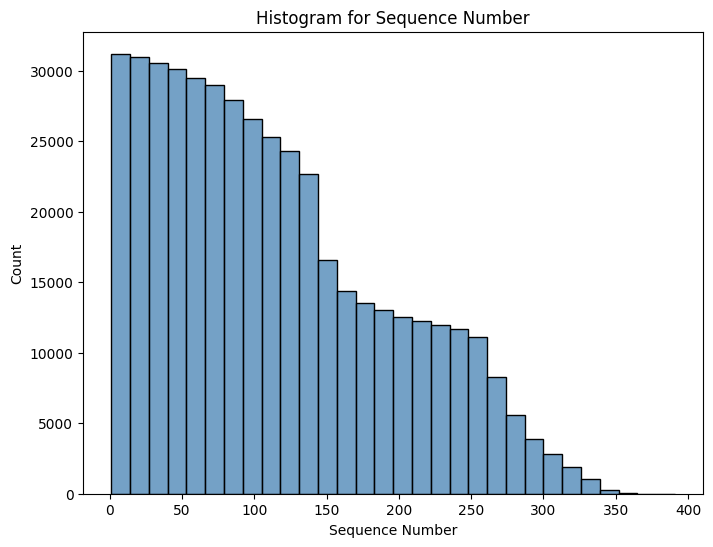

In [77]:
QSSEQ = qs['QSSEQ'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(QSSEQ, kde=False, color='steelblue', bins=30)
plt.xlabel('Sequence Number')
plt.ylabel('Count')
plt.title('Histogram for Sequence Number')
plt.show()

- QSSTRESN (Numeric Finding in Standard Units)

In [78]:
# Filter rows for EDSS
filtered_rows = qs[qs['QSTEST']=='EDSS01-Expanded Disability Score']

# Group by EDSS and USUBJID, then count the number of rows for each group
outcome_measure_counts = filtered_rows.groupby(['QSTEST', 'USUBJID']).size().reset_index(name='Observation_Count')
outcome_measure_counts

,QSTEST,USUBJID,Observation_Count
0,EDSS01-Expanded Disability Score,MSOAC/0014,4
1,EDSS01-Expanded Disability Score,MSOAC/0016,1
2,EDSS01-Expanded Disability Score,MSOAC/0019,14
3,EDSS01-Expanded Disability Score,MSOAC/0024,10
4,EDSS01-Expanded Disability Score,MSOAC/0030,5
...,...,...,...
2460,EDSS01-Expanded Disability Score,MSOAC/9986,5
2461,EDSS01-Expanded Disability Score,MSOAC/9987,16
2462,EDSS01-Expanded Disability Score,MSOAC/9995,20
2463,EDSS01-Expanded Disability Score,MSOAC/9998,14


In [79]:
outcome_measure_counts.groupby('QSTEST')['Observation_Count'].describe()

,count,mean,std,min,25%,50%,75%,max
QSTEST,,,,,,,,
EDSS01-Expanded Disability Score,2465.0,10.663286,5.024798,1.0,6.0,11.0,14.0,35.0


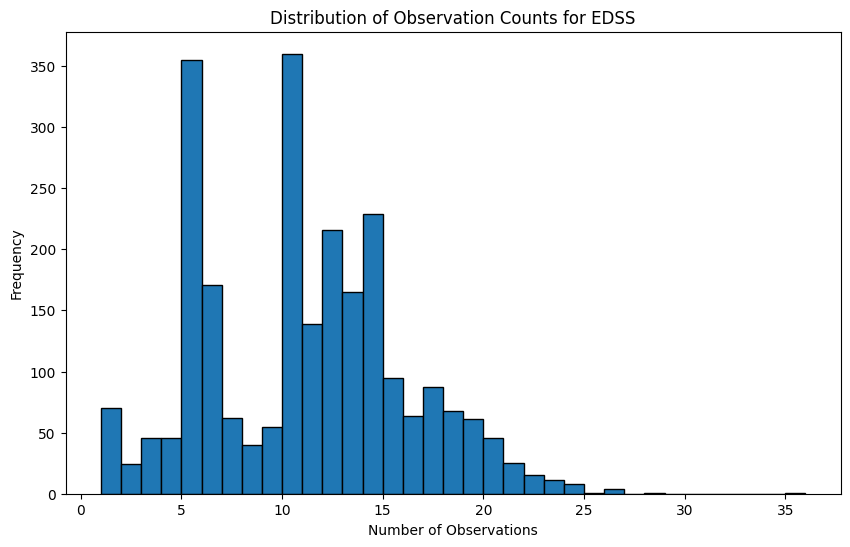

In [80]:
plt.figure(figsize=(10, 6))
plt.hist(outcome_measure_counts['Observation_Count'], bins=range(1, max(outcome_measure_counts['Observation_Count']) + 2), edgecolor='black')
plt.title(f'Distribution of Observation Counts for EDSS')
plt.xlabel('Number of Observations')
plt.ylabel('Frequency')
plt.show()

- VISITNUM (Visit Number)

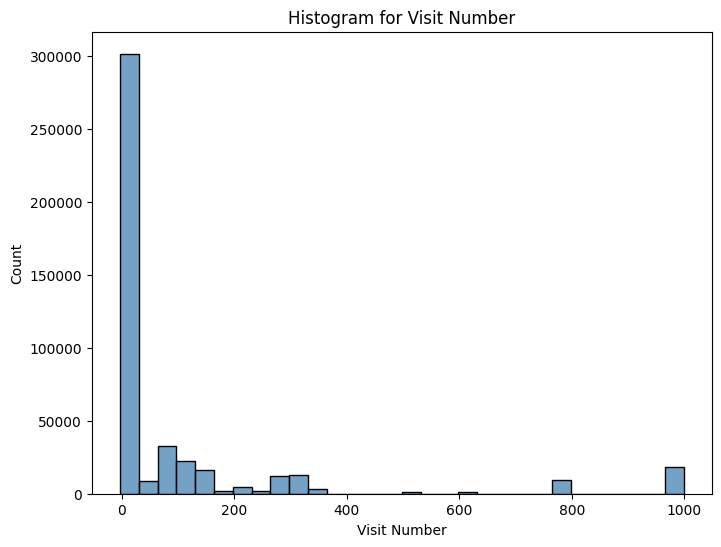

In [81]:
VISITNUM_qs = qs['VISITNUM'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(VISITNUM_qs, kde=False, color='steelblue', bins=30)
plt.xlabel('Visit Number')
plt.ylabel('Count')
plt.title('Histogram for Visit Number')
plt.show()

- QSDY (Study Day of Collection) 

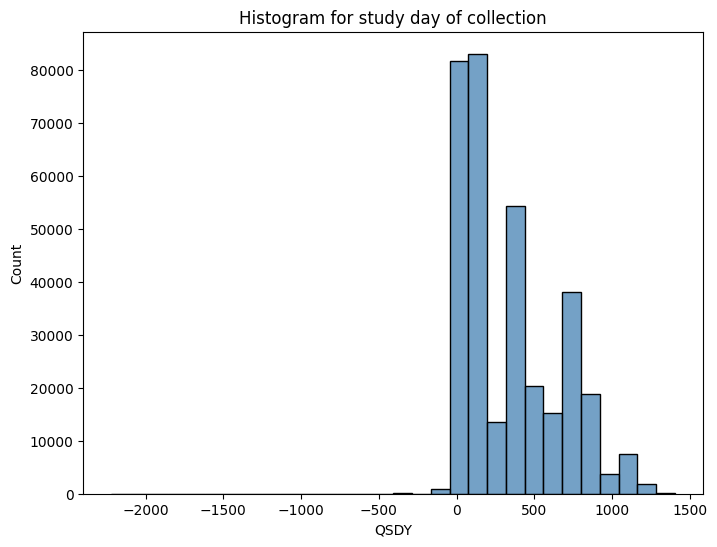

In [82]:
QSDY = qs['QSDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(QSDY, kde=False, color='steelblue', bins=30)
plt.xlabel('QSDY')
plt.ylabel('Count')
plt.title('Histogram for study day of collection')
plt.show()

In [83]:
QSDY.describe()

count    339368.000000
mean        331.487830
std         315.596324
min       -2220.000000
25%          84.000000
50%         253.000000
75%         563.000000
max        1404.000000
Name: QSDY, dtype: float64

In [84]:
unique_QSDY_values_count = qs['QSDY'].nunique()
unique_QSDY_values_count

1091

1091 unique values of study day of collection

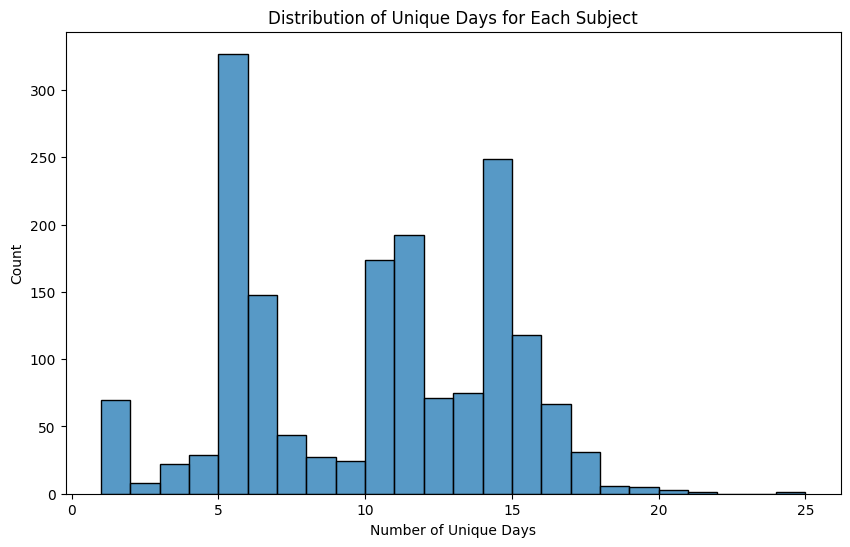

In [85]:
subject_days_count = qs.groupby('USUBJID')['QSDY'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(subject_days_count, bins=range(1, subject_days_count.max() + 2), kde=False)
plt.title('Distribution of Unique Days for Each Subject')
plt.xlabel('Number of Unique Days')
plt.ylabel('Count')
plt.show()

Distribution of the length of follow-up

Number of unique values in the 'Difference' column: 503


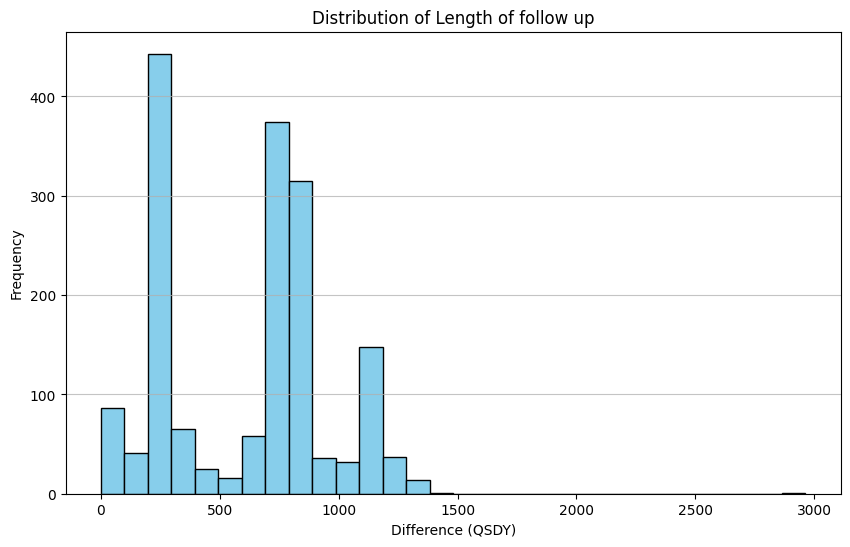

In [86]:
# Calculate the maximum and minimum values of QSDY for each unique patient ID
qs_max_min = qs.groupby('USUBJID')['QSDY'].agg(['max', 'min']).reset_index()

# Calculate the difference between the maximum and minimum values
qs_max_min['Difference'] = qs_max_min['max'] - qs_max_min['min']

# Display the number of unique values in the "Difference" column
num_unique_values = qs_max_min['Difference'].nunique()
print(f"Number of unique values in the 'Difference' column: {num_unique_values}")

# Plot the histogram of the distribution of the difference
plt.figure(figsize=(10, 6))
plt.hist(qs_max_min['Difference'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Length of follow up')
plt.xlabel('Difference (QSDY)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

- Descriptive statistics for categorical variables

In [87]:
categorical_columns = ['QSTEST', 'QSCAT', 'QSSCAT', 'QSSTRESC', 'VISIT', 'QSEVLINT']

descriptive_categorical = {}
for col in categorical_columns:
    descriptive_categorical[col] = {
        'Count': qs[col].count(),
        'Missing Cases': qs[col].isna().sum(),
        'Unique Values': qs[col].nunique(),
        'Mode': qs[col].mode().values[0],
        'Mode Frequency': qs[col].value_counts().max()
    }

cat_qs = pd.DataFrame(descriptive_categorical).T
cat_qs

,Count,Missing Cases,Unique Values,Mode,Mode Frequency
QSTEST,448912,0,82,EDSS01-Expanded Disability Score,26285
QSCAT,448912,0,5,KFSS,188254
QSSCAT,182616,266296,14,PHYSICAL FUNCTIONING,48763
QSSTRESC,447312,1600,166,0,110990
VISIT,448912,0,110,BASELINE,39162
QSEVLINT,154327,294585,2,-P4W,104924


- Number of observations for each QSTEST (Question Name) category

In [88]:
QSTEST_counts = qs['QSTEST'].value_counts().reset_index()
QSTEST_counts.columns = ['QSTEST', 'Count']
QSTEST_counts

,QSTEST,Count
0,EDSS01-Expanded Disability Score,26285
1,KFSS1-Sensory Functions,26219
2,KFSS1-Brain Stem Functions,26218
3,KFSS1-Bowel and Bladder Functions,26217
4,KFSS1-Cerebral or Mental Functions,26216
...,...,...
77,SF121-Amt Time Interfere Social Activity,1491
78,SF121-Phys Health: Limit Kind of Work,1490
79,KFSS1-Other Functions Specify,575
80,KFSS1-Weakness Interferes With Testing,423


- Number of observations for each QSCAT (Category of Question) category

In [89]:
QSCAT_counts = qs['QSCAT'].value_counts().reset_index()
QSCAT_counts.columns = ['QSCAT', 'Count']
QSCAT_counts

,QSCAT,Count
0,KFSS,188254
1,RAND-36 V1.0,164716
2,BDI-II,51756
3,EDSS,26285
4,SF-12 V2,17901


- Number of observations for each QSSCAT (subcategory for question) category

In [90]:
QSSCAT_counts = qs['QSSCAT'].value_counts().reset_index()
QSSCAT_counts.columns = ['QSSCAT', 'Count']
QSSCAT_counts

,QSSCAT,Count
0,PHYSICAL FUNCTIONING,48763
1,GENERAL HEALTH,24348
2,EMOTIONAL WELL-BEING,22887
3,ROLE LIMITATIONS DUE TO PHYSICAL HEALTH,18305
4,ENERGY/FATIGUE,18304
5,ROLE LIMITATIONS DUE TO EMOTIONAL PROBLEMS,13718
6,SOCIAL FUNCTIONING,10630
7,PAIN,9149
8,HEALTH CHANGE,4581
9,ROLE EMOTIONAL,2984


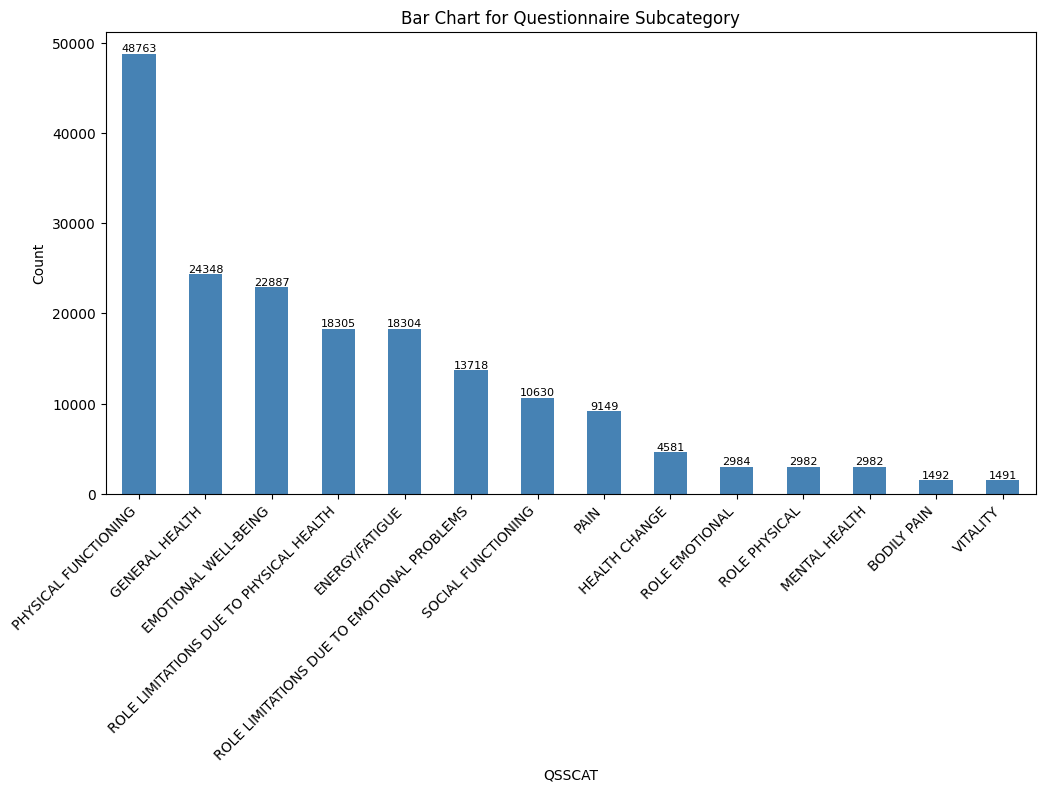

In [91]:
plt.figure(figsize=(12, 6))
ax = qs['QSSCAT'].value_counts().plot(kind='bar', color='steelblue')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)

plt.xlabel('QSSCAT')
plt.ylabel('Count')
plt.title('Bar Chart for Questionnaire Subcategory')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

- Number of observations for each QSSTRESC (Character Result/Finding in Std Format) category

- Number of observations for each VISIT (Visit Name) category 

In [92]:
VISIT_counts = qs['VISIT'].value_counts().reset_index()
VISIT_counts.columns = ['VISIT', 'Count']
VISIT_counts

,VISIT,Count
0,BASELINE,39162
1,WEEK 24,32337
2,WEEK 12,22797
3,DAY 1,20853
4,MONTH 12,14275
...,...,...
105,VISIT8A MTH 6,32
106,END OF TREATMENT,22
107,MONTH 48,16
108,RELAPSE VISIT 5,16


- Number of observations for each QSEVLINT (Evaluation Interval) category 

In [93]:
QSEVLINT_counts = qs['QSEVLINT'].value_counts().reset_index()
QSEVLINT_counts.columns = ['QSEVLINT', 'Count']
QSEVLINT_counts

,QSEVLINT,Count
0,-P4W,104924
1,-P2W,49403


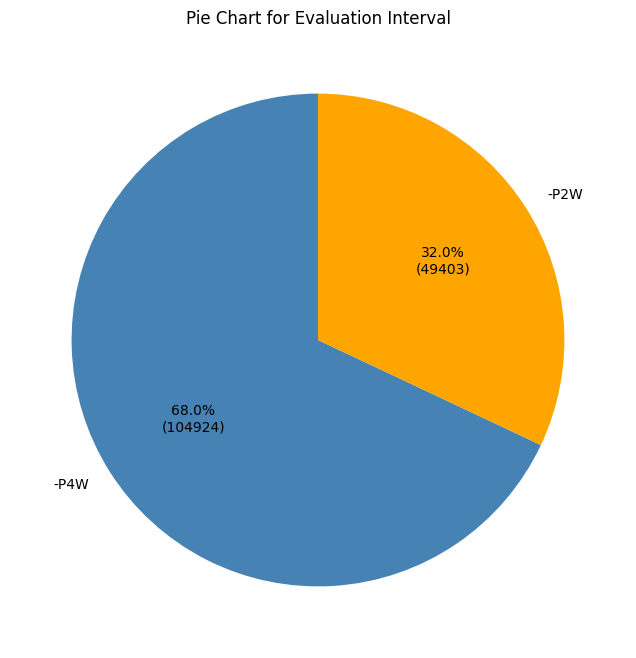

In [94]:
QSEVLINT_counts = qs['QSEVLINT'].dropna().value_counts()

plt.figure(figsize=(8, 8))
plt.pie(QSEVLINT_counts, labels=QSEVLINT_counts.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(QSEVLINT_counts) / 100), startangle=90, colors=['steelblue', 'orange', 'green', 'red', 'purple'])
plt.title('Pie Chart for Evaluation Interval')
plt.show()

alleen BDI total score is numeriek, fix mistakes (bv EDSS van 3.6, inspect all graphs)

### Create a static dataframe

In [95]:
QSDY.describe()

count    339368.000000
mean        331.487830
std         315.596324
min       -2220.000000
25%          84.000000
50%         253.000000
75%         563.000000
max        1404.000000
Name: QSDY, dtype: float64

In [96]:
missing_percentages = qs.groupby('QSCAT')['QSDY'].apply(lambda x: (x.isnull().sum() / len(x)) * 100)
print("Missing percentage of study day for each outcome category:")
print(missing_percentages.round(2))

Missing percentage of study day for each outcome category:
QSCAT
BDI-II           0.00
EDSS            41.14
KFSS            51.98
RAND-36 V1.0     0.53
SF-12 V2         0.00
Name: QSDY, dtype: float64


#### EDSS

In [97]:
EDSS_rows = qs[qs['QSCAT'] == 'EDSS']
EDSS_rows['QSDY'].describe()

count    15471.000000
mean       325.069937
std        297.286138
min       -407.000000
25%         85.000000
50%        254.000000
75%        547.000000
max       1404.000000
Name: QSDY, dtype: float64

In [98]:
# Create subsets for different time periods
before_study_start = qs[qs['QSDY'] < 1]
two_years_after_start = qs[(qs['QSDY'] >= 1) & (qs['QSDY'] <= 730)]
four_years_after_start = qs[qs['QSDY'] > 730]

# Function to count observations for a given subset
def count_observations(subset, title):
    filtered_rows = subset[subset['QSCAT'] == 'EDSS']
    outcome_measure_counts = filtered_rows.groupby(['QSCAT', 'USUBJID']).size().reset_index(name='Observation_Count')
    
    print(f"\n{title}")
    return outcome_measure_counts.groupby('QSCAT')['Observation_Count'].describe()

# Apply the function for each time period
count_observations(before_study_start, 'Before Study Start')



Before Study Start


,count,mean,std,min,25%,50%,75%,max
QSCAT,,,,,,,,
EDSS,1689.0,1.033156,0.179096,1.0,1.0,1.0,1.0,2.0


In [99]:
count_observations(two_years_after_start, '2 Years After Study Start')


2 Years After Study Start


,count,mean,std,min,25%,50%,75%,max
QSCAT,,,,,,,,
EDSS,1622.0,7.413687,2.72143,1.0,5.0,9.0,9.0,18.0


In [100]:
count_observations(four_years_after_start, '4 Years After Study Start')


4 Years After Study Start


,count,mean,std,min,25%,50%,75%,max
QSCAT,,,,,,,,
EDSS,647.0,2.629057,1.363485,1.0,2.0,2.0,4.0,8.0


It doesn't seem to be a good grouping here (discard this, avg number of observations per patient is not relevant for time bin grouping they said!) - but I want to look at maximum EDSS score and not calculate a median or mean so maybe I just track the maximum EDSS each year?

I think the calculation beneath is still not entirely correct - I spent hours on tweaking this because i kept getting wrong results it's already a bit better now

In [101]:
# Filter the DataFrame to include only the specified FTTEST values
EDSS_df = EDSS_rows.copy()  # Create a copy to avoid the warning

conditions = [
    (EDSS_df['QSDY'] <= 0),
    ((EDSS_df['QSDY'] > 0) & (EDSS_df['QSDY'] <= 365)),
    ((EDSS_df['QSDY'] > 365) & (EDSS_df['QSDY'] <= 730)),
    ((EDSS_df['QSDY'] > 730) & (EDSS_df['QSDY'] <= 1095)),
    ((EDSS_df['QSDY'] > 1095) & (EDSS_df['QSDY'] <= 1460))  # maximal value is 1404
]

# Define corresponding values for each condition
values = ['before', '1y', '2y', '3y', '4y']

# Create the new column "FT_PERIOD"
EDSS_df['QS_PERIOD'] = np.select(conditions, values, default='NaN')
EDSS_df.head(12)

,USUBJID,QSSEQ,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESC,QSSTRESN,VISITNUM,VISIT,QSDY,QSEVLINT,QS_PERIOD
216853,MSOAC/0014,1,EDSS01-Expanded Disability Score,EDSS,NaN,1,1,1.0,1.0,SCREENING D-28 TO -2,NaN,NaN,NaN
0,MSOAC/0014,9,EDSS01-Expanded Disability Score,EDSS,NaN,1.5,1.5,1.5,2.0,BASELINE,NaN,NaN,NaN
168426,MSOAC/0014,17,EDSS01-Expanded Disability Score,EDSS,NaN,2,2,2.0,7.0,MONTH 3,NaN,NaN,NaN
86626,MSOAC/0014,25,EDSS01-Expanded Disability Score,EDSS,NaN,2,2,2.0,777.0,END OF STUDY,NaN,NaN,NaN
205218,MSOAC/0016,1,EDSS01-Expanded Disability Score,EDSS,NaN,6,6,6.0,1.0,SCREENING,-21.0,NaN,before
214058,MSOAC/0019,1,EDSS01-Expanded Disability Score,EDSS,NaN,4,4,4.0,-3.0,SCREENING -3,-27.0,NaN,before
45,MSOAC/0019,10,EDSS01-Expanded Disability Score,EDSS,NaN,3.5,3.5,3.5,0.0,BASELINE,1.0,NaN,1y
168434,MSOAC/0019,55,EDSS01-Expanded Disability Score,EDSS,NaN,3.5,3.5,3.5,3.0,MONTH 3,93.0,NaN,1y
191059,MSOAC/0019,64,EDSS01-Expanded Disability Score,EDSS,NaN,3,3,3.0,6.0,MONTH 6,184.0,NaN,1y
197903,MSOAC/0019,73,EDSS01-Expanded Disability Score,EDSS,NaN,3,3,3.0,9.0,MONTH 9,263.0,NaN,1y


In [102]:
# Calculate the maximum value of QSSTRESN for each different value of QS_PERIOD
max_EDSS_df = EDSS_df.groupby(['USUBJID', 'QS_PERIOD'])['QSSTRESN'].max().reset_index()

# Pivot the table
pivot_EDSS_df = max_EDSS_df.pivot_table(index='USUBJID', columns='QS_PERIOD', values='QSSTRESN').reset_index()

# Reorganize the columns with the desired naming convention
pivot_EDSS_df.columns = [f'EDSS_{col}' if col != 'USUBJID' else col for col in pivot_EDSS_df.columns]

# Define the desired column order
column_order = ['USUBJID', 'EDSS_before', 'EDSS_1y', 'EDSS_2y', 'EDSS_3y', 'EDSS_4y', 'EDSS_NaN']

# Reorder the columns based on column_order
pivot_EDSS_df = pivot_EDSS_df[column_order]

# Merge the new DataFrame with the original DataFrame on 'USUBJID'
result_EDSS = pd.merge(EDSS_df[['USUBJID']], pivot_EDSS_df, on='USUBJID', how='left')

# Drop duplicate rows to keep only unique rows per patient
result_EDSS = result_EDSS.drop_duplicates(subset='USUBJID')

result_EDSS.head(50)

,USUBJID,EDSS_before,EDSS_1y,EDSS_2y,EDSS_3y,EDSS_4y,EDSS_NaN
0,MSOAC/0014,NaN,NaN,NaN,NaN,NaN,2.0
4,MSOAC/0016,6.0,NaN,NaN,NaN,NaN,NaN
5,MSOAC/0019,4.0,3.5,3.5,3.0,NaN,NaN
19,MSOAC/0024,4.0,4.0,4.0,NaN,NaN,NaN
29,MSOAC/0030,2.0,2.0,NaN,NaN,NaN,NaN
34,MSOAC/0031,1.0,1.5,1.0,1.5,NaN,NaN
48,MSOAC/0034,NaN,NaN,NaN,NaN,NaN,1.5
67,MSOAC/0035,NaN,NaN,NaN,NaN,NaN,2.5
75,MSOAC/0041,6.5,7.5,NaN,NaN,NaN,NaN
82,MSOAC/0044,NaN,NaN,NaN,NaN,NaN,6.0


In [103]:
# Find rows where EDSS_3y is not equal to EDSS_4y and both are non-missing
diff_3y_4y = result_EDSS[(result_EDSS['EDSS_3y'].notna()) & (result_EDSS['EDSS_4y'].notna()) & (result_EDSS['EDSS_3y'] != result_EDSS['EDSS_4y'])]

# Get the number of rows
num_diff_3y_4y = len(diff_3y_4y)
print(f"Number of rows where EDSS_3y is not equal to EDSS_4y and both are non-missing: {num_diff_3y_4y}")

Number of rows where EDSS_3y is not equal to EDSS_4y and both are non-missing: 31


might be better to put 3 & 4y just together based on this i think + also 97% missing (I know having a few hundred obs is still enough but only 3% is like only 80 patients)

In [104]:
# Calculate the percentage of missing values for each column
missing_percentage = result_EDSS.isnull().mean() * 100

# Create a DataFrame with missing values and their percentages
missing_data = pd.DataFrame({'Column': missing_percentage.index, 'MissingPercentage': missing_percentage.values})

# Sort the DataFrame by missing percentage in descending order
missing_data_sorted = missing_data.sort_values(by='MissingPercentage', ascending=False)

# Print the result
print(missing_data_sorted)

        Column  MissingPercentage
5      EDSS_4y          96.673428
4      EDSS_3y          73.752535
6     EDSS_NaN          68.600406
3      EDSS_2y          57.241379
2      EDSS_1y          34.198783
1  EDSS_before          31.480730
0      USUBJID           0.000000


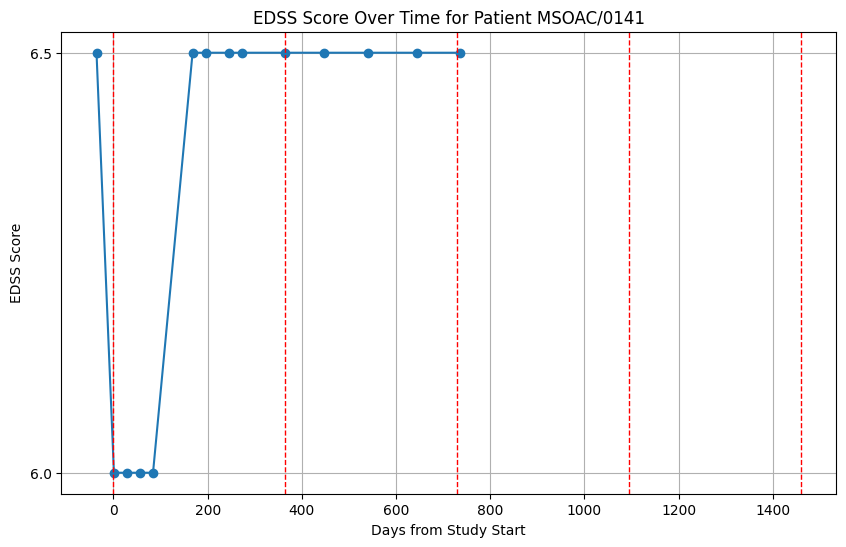

In [105]:
import matplotlib.pyplot as plt

# Choose the patient_id
patient_id = 'MSOAC/0053'
patient_id = 'MSOAC/0076'
patient_id = 'MSOAC/0141'

# Filter the DataFrame for the specific patient
patient_data = EDSS_rows[EDSS_rows['USUBJID'] == patient_id]

# Plot the EDSS score over time
plt.figure(figsize=(10, 6))
plt.plot(patient_data['QSDY'], patient_data['QSSTRESN'], marker='o')
plt.title(f'EDSS Score Over Time for Patient {patient_id}')
plt.xlabel('Days from Study Start')
plt.ylabel('EDSS Score')
plt.grid(True)

# Set y-axis ticks in increments of 0.5, starting from the minimal value
min_value = patient_data['QSSTRESN'].min()
max_value = patient_data['QSSTRESN'].max()
plt.yticks([i * 0.5 for i in range(int(min_value * 2), int(max_value * 2) + 1)])

# Add vertical lines at specific QSDY values
vertical_lines = [0, 365, 730, 1095, 1460]
for line in vertical_lines:
    plt.axvline(x=line, color='r', linestyle='--', linewidth=1)

plt.show()

#### KFSS

In [106]:
KFSS_qs = qs[qs['QSCAT'] == 'KFSS']
KFSS_qs = KFSS_qs.drop(columns=['QSSEQ','VISITNUM','VISIT'])
KFSS_qs

,USUBJID,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESC,QSSTRESN,QSDY,QSEVLINT
216854,MSOAC/0014,KFSS1-Pyramidal Functions,KFSS,NaN,1,1,1.0,NaN,NaN
216855,MSOAC/0014,KFSS1-Cerebellar Functions,KFSS,NaN,0,0,0.0,NaN,NaN
216856,MSOAC/0014,KFSS1-Brain Stem Functions,KFSS,NaN,0,0,0.0,NaN,NaN
216857,MSOAC/0014,KFSS1-Sensory Functions,KFSS,NaN,0,0,0.0,NaN,NaN
216858,MSOAC/0014,KFSS1-Bowel and Bladder Functions,KFSS,NaN,0,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
234423,MSOAC/9999,KFSS1-Brain Stem Functions,KFSS,NaN,2,2,2.0,NaN,NaN
234424,MSOAC/9999,KFSS1-Sensory Functions,KFSS,NaN,2,2,2.0,NaN,NaN
234425,MSOAC/9999,KFSS1-Bowel and Bladder Functions,KFSS,NaN,1,1,1.0,NaN,NaN
234426,MSOAC/9999,KFSS1-Visual or Optic Functions,KFSS,NaN,0,0,0.0,NaN,NaN


In [107]:
missing_percentage_kfss = (KFSS_qs.isnull().sum() / len(KFSS_qs)) * 100
missing_kfss = pd.DataFrame({'Column Name': missing_percentage_kfss.index, 'Missing Percentage': missing_percentage_kfss.values})
missing_kfss = missing_kfss.sort_values(by='Missing Percentage', ascending=False)
print(missing_kfss)

  Column Name  Missing Percentage
3      QSSCAT          100.000000
8    QSEVLINT          100.000000
7        QSDY           51.981897
6    QSSTRESN            0.636374
4     QSORRES            0.106239
5    QSSTRESC            0.106239
0     USUBJID            0.000000
1      QSTEST            0.000000
2       QSCAT            0.000000


In [108]:
KFSS_qs = KFSS_qs.drop(columns=['QSSCAT','QSEVLINT'])

In [114]:
pivot_table = KFSS_qs.pivot_table(index='QSTEST', columns='QSSTRESN', aggfunc='size', fill_value=0)

pivot_table

QSSTRESN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,9.0,99.0
QSTEST,,,,,,,,,
KFSS1-Bowel and Bladder Functions,11037,8226,4614,1824,430,58,15,0,0
KFSS1-Brain Stem Functions,14582,6465,3954,1087,120,1,0,0,0
KFSS1-Cerebellar Functions,8412,5185,6586,4680,1030,64,0,77,1
KFSS1-Cerebral or Mental Functions,15528,4363,5894,396,24,0,0,0,0
KFSS1-Other Functions,3235,567,0,0,0,0,0,0,0
KFSS1-Pyramidal Functions,3727,6140,5123,8727,2348,140,2,0,0
KFSS1-Sensory Functions,8899,5051,8056,3528,605,67,0,0,1
KFSS1-Visual or Optic Functions,13442,6739,4375,939,420,155,116,1,0


Note: some tests are on a scale 0-5 and others 0-6!!

Idea: 
- sum results of all tests per patient (and normalize)
- check change over time (?)

#### RAND-36 V1.0

In [ ]:
RAND36_qs = qs[qs['QSCAT'] == 'RAND-36 V1.0']
RAND36_qs = RAND36_qs.drop(columns=['QSSEQ','QSSTRESC','VISITNUM','VISIT'])
RAND36_qs

,USUBJID,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESN,QSDY,QSEVLINT
17,MSOAC/0019,R3601-Would You Say Your Health Is,RAND-36 V1.0,GENERAL HEALTH,3,3.0,1.0,NaN
22,MSOAC/0019,R3601-Health Now Compared to 1 Year Ago,RAND-36 V1.0,HEALTH CHANGE,4,4.0,1.0,NaN
25,MSOAC/0019,R3601-Health Limit Vigorous Activities,RAND-36 V1.0,PHYSICAL FUNCTIONING,1,1.0,1.0,NaN
26,MSOAC/0019,R3601-Health Limit Moderate Activities,RAND-36 V1.0,PHYSICAL FUNCTIONING,3,3.0,1.0,NaN
27,MSOAC/0019,R3601-Health Limit Carrying Groceries,RAND-36 V1.0,PHYSICAL FUNCTIONING,3,3.0,1.0,NaN
...,...,...,...,...,...,...,...,...
83481,MSOAC/9998,R3601-Amt Time Interfere Social Activity,RAND-36 V1.0,SOCIAL FUNCTIONING,3,3.0,1072.0,-P4W
83456,MSOAC/9998,R3601-Get Sick Easier Than Other People,RAND-36 V1.0,GENERAL HEALTH,3,3.0,1072.0,NaN
83457,MSOAC/9998,R3601-I Am as Healthy as Anybody I Know,RAND-36 V1.0,GENERAL HEALTH,3,3.0,1072.0,NaN
83458,MSOAC/9998,R3601-I Expect My Health to Get Worse,RAND-36 V1.0,GENERAL HEALTH,2,2.0,1072.0,NaN


In [ ]:
missing_percentage_rand36 = (RAND36_qs.isnull().sum() / len(RAND36_qs)) * 100
missing_rand36 = pd.DataFrame({'Column Name': missing_percentage_rand36.index, 'Missing Percentage': missing_percentage_rand36.values})
missing_rand36 = missing_rand36.sort_values(by='Missing Percentage', ascending=False)
print(missing_rand36)

  Column Name  Missing Percentage
7    QSEVLINT           44.448627
4     QSORRES            1.169285
5    QSSTRESN            0.842663
6        QSDY            0.529396
3      QSSCAT            0.000607
0     USUBJID            0.000000
1      QSTEST            0.000000
2       QSCAT            0.000000


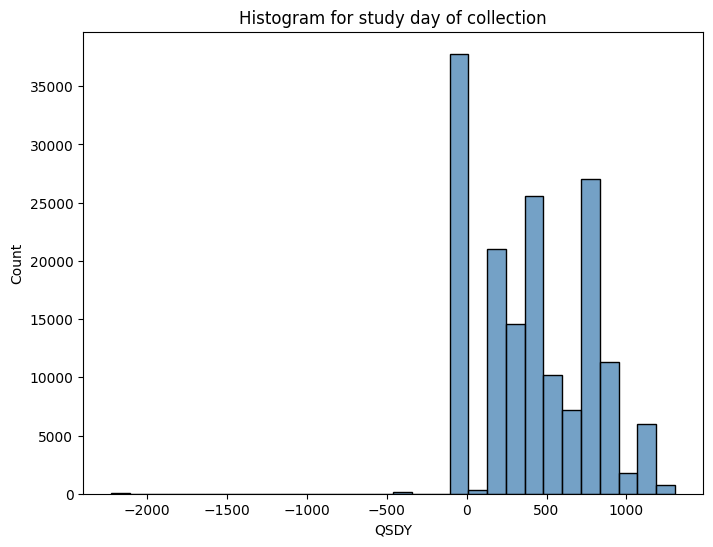

In [ ]:
QSDY = RAND36_qs['QSDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(QSDY, kde=False, color='steelblue', bins=30)
plt.xlabel('QSDY')
plt.ylabel('Count')
plt.title('Histogram for study day of collection')
plt.show()

In [ ]:
# QSTEST
qsscat_counts_qs = RAND36_qs['QSTEST'].value_counts().reset_index()
qsscat_counts_qs.columns = ['QSTEST', 'Count']
total_count = qsscat_counts_qs['Count'].sum()
qsscat_counts_qs['Percentage'] = (qsscat_counts_qs['Count'] / total_count) * 100
qsscat_counts_qs

,QSTEST,Count,Percentage
0,R3601-Health Now Compared to 1 Year Ago,4581,2.781151
1,R3601-I Am as Healthy as Anybody I Know,4580,2.780543
2,R3601-Health Limit Climb Several Flights,4580,2.780543
3,R3601-Health Limit Walk Several Blocks,4580,2.780543
4,R3601-I Expect My Health to Get Worse,4579,2.779936
5,R3601-Have Felt So Down in the Dumps,4579,2.779936
6,R3601-Health Limit Vigorous Activities,4578,2.779329
7,R3601-Health Limit Moderate Activities,4578,2.779329
8,R3601-Health Limit Climb One Flight,4578,2.779329
9,R3601-Have Felt Downhearted and Blue,4578,2.779329


In [ ]:
# QSSCAT
qsscat_counts_qs = RAND36_qs['QSSCAT'].value_counts().reset_index()
qsscat_counts_qs.columns = ['QSSCAT', 'Count']
total_count = qsscat_counts_qs['Count'].sum()
qsscat_counts_qs['Percentage'] = (qsscat_counts_qs['Count'] / total_count) * 100
qsscat_counts_qs

,QSSCAT,Count,Percentage
0,PHYSICAL FUNCTIONING,45777,27.791640
1,EMOTIONAL WELL-BEING,22887,13.894909
2,GENERAL HEALTH,22855,13.875482
3,ROLE LIMITATIONS DUE TO PHYSICAL HEALTH,18305,11.113135
4,ENERGY/FATIGUE,18304,11.112528
5,ROLE LIMITATIONS DUE TO EMOTIONAL PROBLEMS,13718,8.328325
6,PAIN,9149,5.554443
7,SOCIAL FUNCTIONING,9139,5.548371
8,HEALTH CHANGE,4581,2.781167


See scale for each category of questionnaire

In [ ]:
# PHYSICAL FUNCTIONING
phys_funct = RAND36_qs[RAND36_qs['QSSCAT'] == 'PHYSICAL FUNCTIONING']

qsstresn_counts_qs = phys_funct['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,1.0,19542,42.958892
1,2.0,14507,31.890525
2,3.0,11441,25.150583


In [ ]:
phys_funct_per_qsteet = phys_funct.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
phys_funct_per_qsteet = phys_funct_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
phys_funct_per_qsteet

,QSTEST,QSSTRESN,Count
2,R3601-Health Limit Bathing/Dressing Self,1.0,403
1,R3601-Health Limit Bathing/Dressing Self,2.0,1761
0,R3601-Health Limit Bathing/Dressing Self,3.0,2396
4,R3601-Health Limit Bending or Kneeling,1.0,1430
3,R3601-Health Limit Bending or Kneeling,2.0,1929
5,R3601-Health Limit Bending or Kneeling,3.0,1189
7,R3601-Health Limit Carrying Groceries,1.0,1608
6,R3601-Health Limit Carrying Groceries,2.0,1814
8,R3601-Health Limit Carrying Groceries,3.0,1122
11,R3601-Health Limit Climb One Flight,1.0,1161


In [ ]:
# EMOTIONAL WELL-BEING
emotion = RAND36_qs[RAND36_qs['QSSCAT'] == 'EMOTIONAL WELL-BEING']

qsstresn_counts_qs = emotion['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,6.0,5702,25.132228
1,5.0,4982,21.958745
2,4.0,4566,20.125176
3,2.0,3588,15.814528
4,3.0,2815,12.407440
5,1.0,1035,4.561883


In [ ]:
emotion_per_qsteet = emotion.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
emotion_per_qsteet = emotion_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
emotion_per_qsteet

,QSTEST,QSSTRESN,Count
5,R3601-Have Been a Very Nervous Person,1.0,73
4,R3601-Have Been a Very Nervous Person,2.0,174
3,R3601-Have Been a Very Nervous Person,3.0,387
2,R3601-Have Been a Very Nervous Person,4.0,1002
1,R3601-Have Been a Very Nervous Person,5.0,1325
0,R3601-Have Been a Very Nervous Person,6.0,1583
11,R3601-Have Felt Downhearted and Blue,1.0,62
10,R3601-Have Felt Downhearted and Blue,2.0,176
9,R3601-Have Felt Downhearted and Blue,3.0,361
8,R3601-Have Felt Downhearted and Blue,4.0,970


In [ ]:
# GENERAL HEALTH
gen_health = RAND36_qs[RAND36_qs['QSSCAT'] == 'GENERAL HEALTH']

qsstresn_counts_qs = gen_health['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,3.0,5681,25.131608
1,2.0,5303,23.459412
2,4.0,5278,23.348817
3,5.0,4353,19.256802
4,1.0,1990,8.803362


In [ ]:
gen_health_per_qsteet = gen_health.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
gen_health_per_qsteet = gen_health_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
gen_health_per_qsteet

,QSTEST,QSSTRESN,Count
4,R3601-Get Sick Easier Than Other People,1.0,159
3,R3601-Get Sick Easier Than Other People,2.0,473
2,R3601-Get Sick Easier Than Other People,3.0,808
1,R3601-Get Sick Easier Than Other People,4.0,1416
0,R3601-Get Sick Easier Than Other People,5.0,1673
9,R3601-I Am as Healthy as Anybody I Know,1.0,684
5,R3601-I Am as Healthy as Anybody I Know,2.0,1417
8,R3601-I Am as Healthy as Anybody I Know,3.0,689
6,R3601-I Am as Healthy as Anybody I Know,4.0,983
7,R3601-I Am as Healthy as Anybody I Know,5.0,757


In [ ]:
# ROLE LIMITATIONS DUE TO PHYSICAL HEALTH
phys_health = RAND36_qs[RAND36_qs['QSSCAT'] == 'ROLE LIMITATIONS DUE TO PHYSICAL HEALTH']

qsstresn_counts_qs = phys_health['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,1.0,10799,59.495345
1,2.0,7352,40.504655


In [ ]:
phys_health_per_qsteet = phys_health.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
phys_health_per_qsteet = phys_health_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
phys_health_per_qsteet

,QSTEST,QSSTRESN,Count
0,R3601-Phys Health: Accomplish Less,1.0,2934
1,R3601-Phys Health: Accomplish Less,2.0,1598
3,R3601-Phys Health: Cut Work Time,1.0,2142
2,R3601-Phys Health: Cut Work Time,2.0,2389
4,R3601-Phys Health: Difficulty Performing,1.0,2855
5,R3601-Phys Health: Difficulty Performing,2.0,1690
6,R3601-Phys Health: Limit Kind of Work,1.0,2868
7,R3601-Phys Health: Limit Kind of Work,2.0,1675


In [ ]:
# ENERGY/FATIGUE
energy_fatigue = RAND36_qs[RAND36_qs['QSSCAT'] == 'ENERGY/FATIGUE']

qsstresn_counts_qs = energy_fatigue['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,4.0,5011,27.610337
1,5.0,3875,21.351039
2,3.0,3447,18.992782
3,2.0,2744,15.119290
4,6.0,2077,11.444157
5,1.0,995,5.482396


In [ ]:
energy_fatigue_per_qsteet = energy_fatigue.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
energy_fatigue_per_qsteet = energy_fatigue_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
energy_fatigue_per_qsteet

,QSTEST,QSSTRESN,Count
5,R3601-Did You Feel Full of Pep,1.0,163
3,R3601-Did You Feel Full of Pep,2.0,684
2,R3601-Did You Feel Full of Pep,3.0,762
0,R3601-Did You Feel Full of Pep,4.0,1257
1,R3601-Did You Feel Full of Pep,5.0,1040
4,R3601-Did You Feel Full of Pep,6.0,631
10,R3601-Did You Feel Tired,1.0,469
8,R3601-Did You Feel Tired,2.0,851
7,R3601-Did You Feel Tired,3.0,1085
6,R3601-Did You Feel Tired,4.0,1316


In [ ]:
# ROLE LIMITATIONS DUE TO EMOTIONAL PROBLEMS
emotion_prob = RAND36_qs[RAND36_qs['QSSCAT'] == 'ROLE LIMITATIONS DUE TO EMOTIONAL PROBLEMS']

qsstresn_counts_qs = emotion_prob['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,2.0,8992,66.137099
1,1.0,4604,33.862901


In [ ]:
emotion_prob_per_qsteet = emotion_prob.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
emotion_prob_per_qsteet = emotion_prob_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
emotion_prob_per_qsteet

,QSTEST,QSSTRESN,Count
1,R3601-Emotional Problem: Accomplish Less,1.0,1881
0,R3601-Emotional Problem: Accomplish Less,2.0,2656
3,R3601-Emotional Problem: Cut Work Time,1.0,1393
2,R3601-Emotional Problem: Cut Work Time,2.0,3142
5,R3601-Emotional Problem: Less Careful,1.0,1330
4,R3601-Emotional Problem: Less Careful,2.0,3194


In [ ]:
# PAIN
pain = RAND36_qs[RAND36_qs['QSSCAT'] == 'PAIN']

qsstresn_counts_qs = pain['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,1.0,3224,35.494881
1,2.0,2027,22.316415
2,3.0,1703,18.749312
3,4.0,1630,17.945613
4,5.0,455,5.009358
5,6.0,44,0.484421


In [ ]:
pain_per_qsteet = pain.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
pain_per_qsteet = pain_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
pain_per_qsteet

,QSTEST,QSSTRESN,Count
0,R3601-Did Pain Interfere With Your Work,1.0,1967
1,R3601-Did Pain Interfere With Your Work,2.0,1091
2,R3601-Did Pain Interfere With Your Work,3.0,899
3,R3601-Did Pain Interfere With Your Work,4.0,480
4,R3601-Did Pain Interfere With Your Work,5.0,98
5,R3601-How Much Bodily Pain Have You Had,1.0,1257
7,R3601-How Much Bodily Pain Have You Had,2.0,936
8,R3601-How Much Bodily Pain Have You Had,3.0,804
6,R3601-How Much Bodily Pain Have You Had,4.0,1150
9,R3601-How Much Bodily Pain Have You Had,5.0,357


In [ ]:
# SOCIAL FUNCTIONING
social_funct = RAND36_qs[RAND36_qs['QSSCAT'] == 'SOCIAL FUNCTIONING']

qsstresn_counts_qs = social_funct['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,3.0,2301,25.509978
1,2.0,1836,20.354767
2,4.0,1776,19.689579
3,1.0,1602,17.760532
4,5.0,1505,16.685144


In [ ]:
social_funct_per_qsteet = social_funct.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
social_funct_per_qsteet = social_funct_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
social_funct_per_qsteet

,QSTEST,QSSTRESN,Count
4,R3601-Amt Time Interfere Social Activity,1.0,150
3,R3601-Amt Time Interfere Social Activity,2.0,548
1,R3601-Amt Time Interfere Social Activity,3.0,1296
2,R3601-Amt Time Interfere Social Activity,4.0,1131
0,R3601-Amt Time Interfere Social Activity,5.0,1370
5,R3601-Extent Interfered Social Activity,1.0,1452
6,R3601-Extent Interfered Social Activity,2.0,1288
7,R3601-Extent Interfered Social Activity,3.0,1005
8,R3601-Extent Interfered Social Activity,4.0,645
9,R3601-Extent Interfered Social Activity,5.0,135


In [ ]:
# HEALTH CHANGE
health_change = RAND36_qs[RAND36_qs['QSSCAT'] == 'HEALTH CHANGE']

qsstresn_counts_qs = health_change['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,3.0,2012,44.258689
1,4.0,1627,35.789705
2,2.0,465,10.228773
3,5.0,236,5.191377
4,1.0,206,4.531456


In [ ]:
health_change_per_qsteet = health_change.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
health_change_per_qsteet = health_change_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
health_change_per_qsteet

,QSTEST,QSSTRESN,Count
4,R3601-Health Now Compared to 1 Year Ago,1.0,206
2,R3601-Health Now Compared to 1 Year Ago,2.0,465
0,R3601-Health Now Compared to 1 Year Ago,3.0,2012
1,R3601-Health Now Compared to 1 Year Ago,4.0,1627
3,R3601-Health Now Compared to 1 Year Ago,5.0,236


*Conclusion:* all questions per QSSCAT use the SAME likert-scale (except for PAIN)

In [ ]:
#pivot_table = RAND36_qs.pivot_table(index='QSTEST', columns='QSSTRESN', values='QSORRES', aggfunc='first')
#grouped = RAND36_qs.groupby(['QSTEST', 'QSSTRESN'])['QSORRES'].apply(list).reset_index()
filtered = RAND36_qs[RAND36_qs['QSSCAT'] == 'PAIN']
grouped = filtered.groupby(['QSTEST', 'QSSTRESN'])['QSORRES'].agg(lambda x: list(set(x))).reset_index()
pivot_table = grouped.pivot_table(index='QSTEST', columns='QSSTRESN', values='QSORRES', aggfunc=lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)
pivot_table

QSSTRESN,1.0,2.0,3.0,4.0,5.0,6.0
QSTEST,,,,,,
R3601-Did Pain Interfere With Your Work,"[Not at all, 1]","[A little bit, 2]","[3, Moderately]","[Quite a bit, 4]","[5, Extremely]",NaN
R3601-How Much Bodily Pain Have You Had,"[nan, 1]","[Very Mild, 2, Very mild]","[3, Mild]","[4, Moderate]","[Severe, 5]","[6, Very severe, Very Severe]"


In [ ]:
p0019 = RAND36_qs[RAND36_qs['USUBJID'] == 'MSOAC/0041']
#p0019 = p0019[p0019['QSTEST'] == 'R3601-I Expect My Health to Get Worse']
p0019['QSDY'].unique() 
#p0019

array([-42., 167., 365.])

In [ ]:
negative_values = RAND36_qs[RAND36_qs['QSDY'] < 0]['USUBJID'].unique()

print(negative_values)

['MSOAC/0041' 'MSOAC/0053' 'MSOAC/0094' 'MSOAC/0102' 'MSOAC/0110'
 'MSOAC/0117' 'MSOAC/0141' 'MSOAC/0185' 'MSOAC/0186' 'MSOAC/0194'
 'MSOAC/0275' 'MSOAC/0295' 'MSOAC/0319' 'MSOAC/0332' 'MSOAC/0354'
 'MSOAC/0373' 'MSOAC/0378' 'MSOAC/0484' 'MSOAC/0578' 'MSOAC/0581'
 'MSOAC/0608' 'MSOAC/0665' 'MSOAC/0689' 'MSOAC/0736' 'MSOAC/0747'
 'MSOAC/0780' 'MSOAC/0804' 'MSOAC/0838' 'MSOAC/0844' 'MSOAC/0890'
 'MSOAC/1001' 'MSOAC/1010' 'MSOAC/1082' 'MSOAC/1163' 'MSOAC/1174'
 'MSOAC/1210' 'MSOAC/1213' 'MSOAC/1237' 'MSOAC/1255' 'MSOAC/1265'
 'MSOAC/1288' 'MSOAC/1408' 'MSOAC/1478' 'MSOAC/1518' 'MSOAC/1655'
 'MSOAC/1656' 'MSOAC/1672' 'MSOAC/1717' 'MSOAC/1723' 'MSOAC/1767'
 'MSOAC/1781' 'MSOAC/1799' 'MSOAC/1808' 'MSOAC/1832' 'MSOAC/1867'
 'MSOAC/1983' 'MSOAC/1993' 'MSOAC/2085' 'MSOAC/2121' 'MSOAC/2123'
 'MSOAC/2144' 'MSOAC/2149' 'MSOAC/2151' 'MSOAC/2158' 'MSOAC/2218'
 'MSOAC/2237' 'MSOAC/2317' 'MSOAC/2402' 'MSOAC/2463' 'MSOAC/2478'
 'MSOAC/2501' 'MSOAC/2534' 'MSOAC/2544' 'MSOAC/2548' 'MSOAC/2569'
 'MSOAC/26